<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Logistic Regression***

In this lab, you will learn about and get hands-on practice with the ***`logistic regression model`***, a popular and effective classification model. Understanding logistic regression and being able to apply it to classification tasks is essential because logistic regression models form the fundamentals of ***neural networks***.

$ \ $

----

## ***Dataset***

We will use a real-world dataset that contains detailed nutrition information about food items for people with diabetes. The objective is to classify whether a diabetic patient should choose:

* More Often,

* Less Often

* In Moderation 

for a specific food item based on the nutrition information in the dataset.



$ \ $

---

## ***Objectives***

After completing this lab you will be able to:

*   Preprocess and generate training and testing datasets

*   Train and fine-tune logistic regression models

*   Interpret trained logistic regression models

*   Evaluate trained logistic regression models





$ \ $

----

## ***Prepare and setup lab environment***

We import the necessary packages.


In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

$ \ $

---

## ***EDA (exploratory data analysis) and Feature Engineering***


$ \ $

$(1)$ Let's load the dataset as a Pandas dataframe and conduct some basic EDA tasks on it.



In [66]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items.csv"
food_df = pd.read_csv(dataset_url)

$ \ $

$(2)$ Let's quickly check its column types.


In [67]:
food_df.dtypes

Calories               float64
Total Fat                int64
Saturated Fat          float64
Monounsaturated Fat    float64
Polyunsaturated Fat    float64
Trans Fat              float64
Cholesterol              int64
Sodium                 float64
Total Carbohydrate     float64
Dietary Fiber          float64
Sugars                 float64
Sugar Alcohol            int64
Protein                float64
Vitamin A                int64
Vitamin C                int64
Calcium                  int64
Iron                     int64
class                   object
dtype: object

$ \ $

$(3)$ Print the first ten food items.

In [68]:
food_df.head(10)

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'
5,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
6,142.0,0,0.0,0.0,0.0,0.0,0,12.0,10.6,0.0,0.0,0,1.2,0,0,0,0,'In Moderation'
7,102.0,0,0.0,0.0,0.0,0.0,0,13.0,5.0,0.0,0.0,0,0.7,0,0,0,0,'In Moderation'
8,145.0,0,0.0,0.0,0.0,0.0,0,17.0,11.0,0.0,0.0,0,1.2,0,0,0,0,'In Moderation'
9,171.0,0,0.0,0.0,0.0,0.0,0,8.0,13.7,0.0,0.0,0,2.5,0,0,0,0,'In Moderation'


$ \ $

$(4)$ Get the row entries with col $0$ to $-1$ (without the last column).

In [69]:
# describimos todas las columnas excepto la ultima en la lista feature_cols
feature_cols = list(food_df.iloc[:, :-1].columns)
feature_cols

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

In [70]:
food_df[feature_cols]

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13255,140.0,5,1.0,0.0,0.0,0.0,0,60.0,23.0,2.0,13.0,0,2.0,0,0,0,4
13256,130.0,4,0.5,0.0,0.0,0.0,0,50.0,23.0,1.0,14.0,0,2.0,0,0,0,4
13257,140.0,3,0.0,0.0,0.0,0.0,0,130.0,26.0,2.0,15.0,0,1.0,0,0,0,2
13258,140.0,3,0.5,0.0,0.0,0.0,0,55.0,27.0,2.0,17.0,0,1.0,0,0,0,2


$ \ $

$(5)$ Obtain descriptive statistics:

In [71]:
food_df.iloc[:, :-1].describe()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000
mean,133.861086,4.475264,1.450617,0.338069,0.254660,0.047459,8.857692,241.867142,18.232020,1.602971,6.645234,0.117949,4.661333,6.287632,6.741855,5.175264,5.235671
std,94.227650,5.386340,2.410318,1.345852,2.230586,0.321402,20.976530,272.284363,14.786316,3.363879,8.328465,1.121529,5.611143,18.374191,23.785100,8.779637,9.119459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,135.000000,17.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000
75%,180.000000,7.000000,2.000000,0.000000,0.000000,0.000000,10.000000,370.000000,27.000000,2.000000,11.000000,0.000000,7.000000,6.000000,2.000000,6.000000,8.000000
max,2210.000000,43.000000,22.000000,40.000000,235.000000,11.000000,450.000000,2431.000000,270.000000,305.000000,115.000000,31.000000,70.000000,622.000000,1000.000000,110.000000,170.000000


$ \ $

----

## ***Note (dataset).***

As we can see from the above output, this dataset contains 17 nutrient categories about each food item. These categories include:

* Calories,

* Total Fat, 

* Protein, 

* Sugar, etc.

And are listed as numeric variables. As such, we only need to ***`scale`*** them for training our logistic regression model so that we can compare our feature coefficients directly.


$ \ $

-----

## ***Question $(1)$***


Next, let's check the target variable in the `class` column to see the label values and their distribution.


In [72]:
pred = food_df.iloc[:, -1:]
pred.value_counts(normalize = True)

class          
'In Moderation'    0.501433
'Less Often'       0.423906
'More Often'       0.074661
dtype: float64

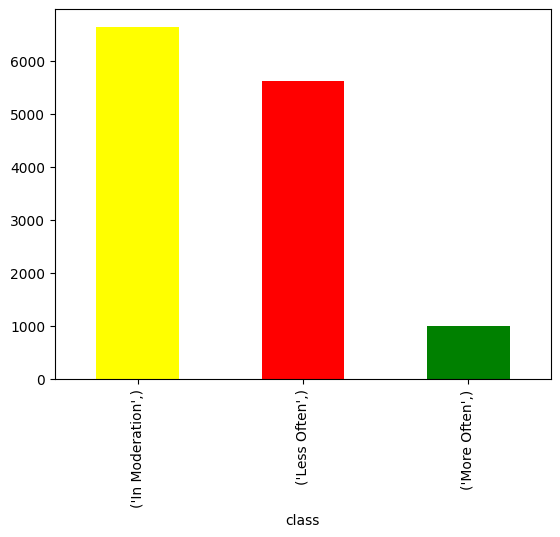

In [115]:
cuentas = pred.value_counts()
cuentas.plot.bar(color = ['yellow', 'red', 'green']);

$ \ $

----

## ***Remark (bar chart above)***

As we can see from the bar chart above, this dataset has three classes: 

* `In Moderation`

* `Less Often`

* `More Often`

The three labels are imbalanced (desequilibrado). For diabetic patients, most food items are in the In Moderation and Less Often categories. This makes diabetes diet management very hard, so we could build a machine learning model to help patients choose their food.

$ \ $

-----

## ***Multinomial Logistic Regression***

We have three labels meaning our logistic regression model will be multinomial with three classes. A ***`multinomial logistic regression`*** is a 

$$\color{aquamarine}{\text{generalized logistic regression model}}$$ 

which generates a probability distribution over all classes, based on the logits or exponentiated log-odds calculated for each class (usually more than two).



$ \ $

----

## ***Feature Engineering***


$(1)$ Now you should have some basic understanding about the food dataset. Next, let's process the raw dataset and construct input data `X` and label (output) `y` for logistic regression model training.



In [74]:
X_raw = food_df.iloc[:, :-1]
y_raw = food_df.iloc[:, -1:]

$ \ $

$(2)$ Fortunately, all feature columns are numeric so we just need to scale them. Here we use the `MinMaxScaler` provided by `sklearn` for scaling.


In [75]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [76]:
# Scaling the raw input features
X = scaler.fit_transform(X_raw)
X

array([[0.06742081, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05565611, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0678733 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06334842, 0.06976744, 0.        , ..., 0.        , 0.        ,
        0.01176471],
       [0.06334842, 0.06976744, 0.02272727, ..., 0.        , 0.        ,
        0.01176471],
       [0.05429864, 0.09302326, 0.02272727, ..., 0.        , 0.        ,
        0.02352941]])

$ \ $

$(3)$ Let's check the scaled feature value range:

In [77]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0


$ \ $

$(4)$ For the target variable `y`, let's use the `LabelEncoder` provided by `sklearn` to encode its three class values.


In [78]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [79]:
y_raw.values

array([["'In Moderation'"],
       ["'In Moderation'"],
       ["'In Moderation'"],
       ...,
       ["'In Moderation'"],
       ["'In Moderation'"],
       ["'In Moderation'"]], dtype=object)

In [80]:
# ravel() devuelve una matriz aplanada contigua. Se devuelve una matriz 1-D que contiene los elementos de la entrada. En este caso es algo casi equivalente a describir la transpuesta
values = y_raw.values.ravel()
values

array(["'In Moderation'", "'In Moderation'", "'In Moderation'", ...,
       "'In Moderation'", "'In Moderation'", "'In Moderation'"],
      dtype=object)

In [81]:
# Entrenamos label_encoder con la data values y le damos el nombre a este conjunto de datos de y.
y = label_encoder.fit_transform(values)
y

array([0, 0, 0, ..., 0, 0, 0])

$ \ $

$(5)$ The encoded target variable will only contain values:

* $0 =$ In Moderation

* $1 =$  Less Often

*  $2 =$ More Often


In [82]:
# este array nos muestra la cantidad de elementos de cada tipo que tenemos en y.
np.unique(y, return_counts = True)

(array([0, 1, 2]), array([6649, 5621,  990]))

$ \ $

----

## ***Train logistic regression models***

$ \ $

$(1)$ First, let's split the training and testing dataset.

* Training dataset will be used to train and tune (afinar) the models.

* Testing dataset will be used to evaluate the models.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 123)

$ \ $

$(2)$ Let's look at the shapes of the split datasets:

In [84]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (10608, 17), y_train: (10608,)


In [85]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (2652, 17), y_test: (2652,)


OK, now we have the training and testing datasets ready, let's start the model training task.

$ \ $

----

## ***Logistic Regression***

$ \ $

$(1)$ We first define a `sklearn.linear_model.LogisticRegression` model with the following arguments, you can check the comment for each argument for what it means.


In [86]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty = 'l2'

# Our classification problem is multinomial
multi_class = 'multinomial'

# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'

# Max iteration = 1000
max_iter = 1000

In [87]:
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state = 123, penalty = 'l2', multi_class = 'multinomial', solver = 'lbfgs', max_iter = 1000)

$ \ $

$(2)$ Let's train the model with training input data `X_train` and labels `y_train`:


In [88]:
l2_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=123)

$ \ $

$(3)$ Let's predict some data from $L^2$ model with `X_test`.


In [89]:
l2_preds = l2_model.predict(X_test)

$ \ $

$(4)$ Because we may need to evaluate the model multiple times with different model hyper parameters, here we define an utility method (function) to take the ground truths (verdades fundamentales):

* Variables:  `y_test` and  `y_pred`.

* Return: A Python `dict` with `accuracy`, `recall`, `precision`, and `f1score`.


In [90]:
def evaluate_metrics(y_test, y_pred):

    # creamos un diccionario vacio
    results_pos = {}

    # agreagamos al diccionario el resultado de accuracy_score sobre la data (yt, yp) y le damos como clave 'accuracy'
    results_pos['accuracy'] = accuracy_score(y_test, y_pred)

    # usamos la funcion precision_recall_fscore_support para obtener precision, recall, f_beta, _
    precision, recall, f_beta, _ = precision_recall_fscore_support(y_test, y_pred)

    # agregagamos al diccionario el resultado de recall
    results_pos['recall'] = recall

    # agregagamos al diccionario el resultado de 'precision'
    results_pos['precision'] = precision

    # agregagamos al diccionario el resultado de 'f1score'
    results_pos['f1score'] = f_beta

    # cuando llamamos la funcion, devolvemos el diccionario creado anteriormente
    return results_pos

In [91]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.774132730015083,
 'recall': array([0.87218045, 0.73220641, 0.35353535]),
 'precision': array([0.73001888, 0.8346856 , 0.90909091]),
 'f1score': array([0.79479274, 0.78009479, 0.50909091])}

As we can see from  the above evaluation results, the logistic regression model has relatively good performance on this multinomial classification task.

* The overall accuracy is around `0.77` 

* The f1score is around `0.8`.

Note that for `recall`, `precision`, and `f1score`, we output the values for each class to see how the model performs on an individual class. And, we can see from the results, the recall for `class = 2` (More often) is not very good. This is actually a common problem called $\color{aquamarine}{\text{imbalanced classification challenge}}$. We will introduce solution to this problem later in this course.


$ \ $

-----

## ***Question $(2)$***

$(1)$ Let's try defining another logistic regression model with $L^1$ penality this time, to see if our classification performance would be improved.


In [92]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'

# Our classification problem is multinomial
multi_class = 'multinomial'

# Use saga for L1 penalty and multinomial classes
solver = 'saga'

# Max iteration = 1000
max_iter = 1000 

In [93]:
# Define a logistic regression model with above arguments
l1_model = LogisticRegression(random_state = 123, penalty = 'l1', multi_class = 'multinomial', solver = 'saga', max_iter = 1000)

$ \ $

$(2)$ We can start to train the new `l1_model` with the new taining dataset.


In [94]:
l1_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   random_state=123, solver='saga')

$ \ $

$(3)$ Make predictions using the input in the test dataset.

In [95]:
l1_preds = l1_model.predict(X_test)

$ \ $

$(4)$ We can also check the class probability distribution using the `predict_proba` function. For example, we want to see the probabilities the first instance in the test dataset:

In [96]:
# tomamos el primer renglon del arreglo matricial. El primer rengon es la primera instancia.
primer_reng = X_test[:1, :]
primer_reng

array([[0.04977376, 0.13953488, 0.15909091, 0.        , 0.        ,
        0.        , 0.        , 0.02262443, 0.04444444, 0.        ,
        0.06086957, 0.        , 0.01428571, 0.        , 0.        ,
        0.        , 0.01176471]])

In [97]:
# l1_model.predict_proba(primer_reng) es dos dimensional, entonces lo volvemos uno dimensional.
odd_ratios = l1_model.predict_proba(primer_reng)[0]
odd_ratios 

array([3.55065558e-02, 9.64491964e-01, 1.47991419e-06])

$ \ $

$(5)$ We can see that  Class 1 has the largest probability $0.96$. As such, the model prediction for this instance will be class `1` and this is the same as the `predict` method.


In [98]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.8092006033182504,
 'recall': array([0.85488722, 0.74377224, 0.87373737]),
 'precision': array([0.78848821, 0.83516484, 0.8277512 ]),
 'f1score': array([0.82034632, 0.78682353, 0.85012285])}

In [99]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.774132730015083,
 'recall': array([0.87218045, 0.73220641, 0.35353535]),
 'precision': array([0.73001888, 0.8346856 , 0.90909091]),
 'f1score': array([0.79479274, 0.78009479, 0.50909091])}

Now, we can see this logistic regression with $L^1$ penalty has much better performance than $L^2$. One possible reason is that $L^1$ penalty may remove some correlated feature variables by shrinking their coefficents to zero. As such, the model is much simplified to avoid overfitting on the training data and better aligned with the logistic regression assumption that all features should be independent.


$ \ $

-----

## ***Confusion Matrix***

$ \ $

$(1)$ We can also plot the confusion matrix based on the true labels and predictions using the `confusion_matrix` method provided by `sklearn` to the $L^1$ model.



In [100]:
cf = confusion_matrix(y_test, l1_preds)

$ \ $

$(2)$ We visualize it using a heatmap method provided by `seaborn`.


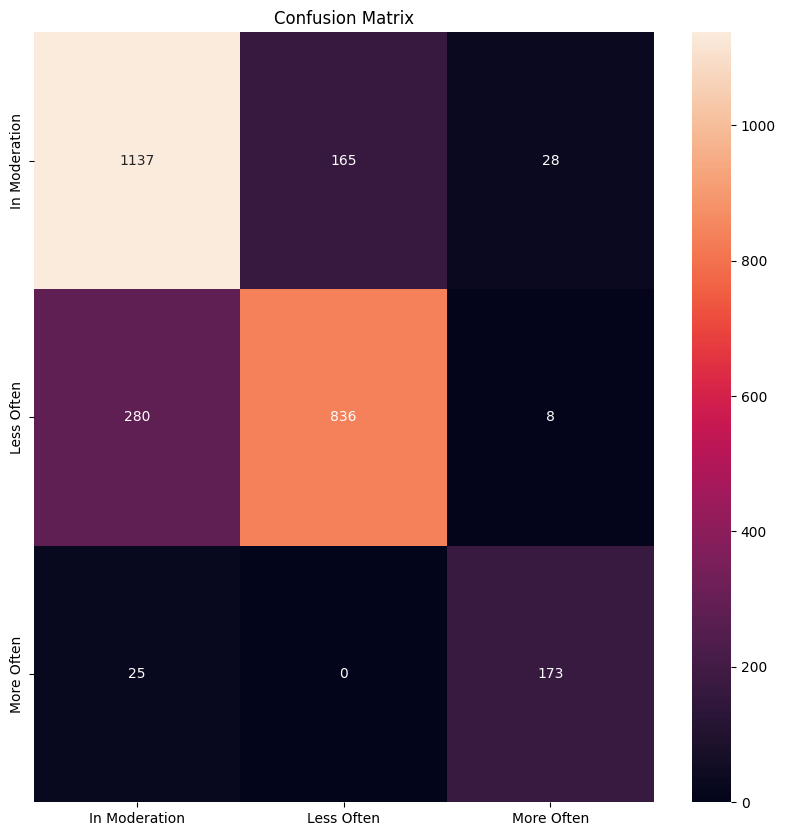

In [101]:
# creamos una figura con un tamaño determinado donde mostraremos nuestra matriz de confusion
plt.figure(figsize = (10, 10))

# creamos una lista donde mostramos los valores encontrados anteriormente en la variable a predecir 
valores = ["In Moderation", "Less Often", "More Often"]

# realizamos un mapa de calor usando la matriz de confusion
ax = sns.heatmap(cf, annot = True, fmt = "d", xticklabels = valores,  yticklabels = valores)

# establecemos el titulo de la matriz de confusion
ax.set(title = "Confusion Matrix");


$ \ $

$(3)$ Do the same to $L^2$ model.

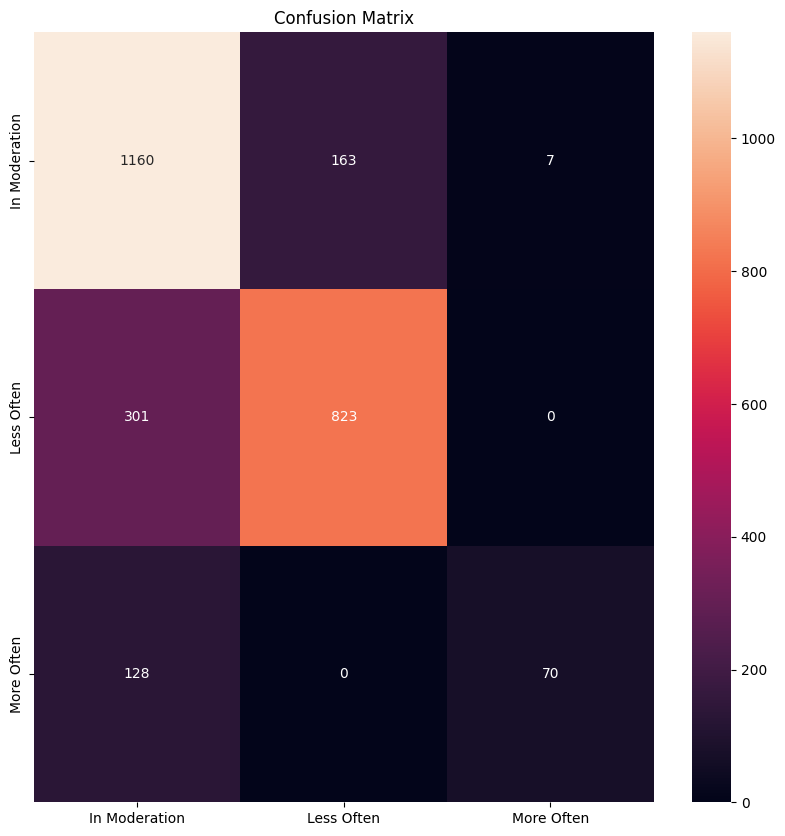

In [116]:
# creamos una figura con un tamaño determinado donde mostraremos nuestra matriz de confusion
plt.figure(figsize = (10, 10))

# creamos una lista donde mostramos los valores encontrados anteriormente en la variable a predecir 
valores = ["In Moderation", "Less Often", "More Often"]

# creamos una matriz de confusion sobre el modelo l2
cf = confusion_matrix(y_test, l2_preds)

# realizamos un mapa de calor usando la matriz de confusion
ax = sns.heatmap(cf, annot = True, fmt = "d", xticklabels = valores,  yticklabels = valores)

# establecemos el titulo de la matriz de confusion
ax.set(title = "Confusion Matrix");

$ \ $ 

----

## ***Interpret logistic regression models***

One way to interpret ***`logistic regression models`*** is by analyzing feature coefficients. Although it may not be as effective as the regular linear regression models because the logistic regression model has a sigmoid function, we can still get a sense for the importance or impact of each feature.

$ \ $

$(1)$ We can check the coefficients for logistic regression model using its `coef_` attribute:



In [102]:
l1_model.coef_

array([[ 1.02260612e+01,  0.00000000e+00,  0.00000000e+00,
         5.28211590e+00,  0.00000000e+00, -3.70560617e+00,
         0.00000000e+00,  9.11923717e-01,  0.00000000e+00,
         2.26627496e+01,  0.00000000e+00,  0.00000000e+00,
         4.30564271e+00,  1.36942545e-01,  0.00000000e+00,
         1.83340368e+00, -2.06761520e-02],
       [ 0.00000000e+00,  4.20223530e+00,  2.46648466e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.94277520e+00,  0.00000000e+00,  1.32251480e+00,
        -6.79834695e+00,  1.51669845e+01,  3.46648083e+00,
         0.00000000e+00, -1.71144958e+00,  0.00000000e+00,
        -1.47866235e-01,  0.00000000e+00],
       [-1.11431018e+02, -2.91410454e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.59642876e+00, -4.13437893e+01,
         0.00000000e+00, -9.27079323e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

$ \ $ 

$(2)$ The `coef_` is a coefficients list with three elements, one element is the actual coefficent for class $0, 1, 2$. To better analyze the coefficients, let's use three utility methods (functions) to sort and visualize them.


In [103]:
def Zip(X,Y):  
  if len(X) == len(Y):
    Zip = []
    for i in range(len(X)):
      Zip.append((X[i], Y[i]))
    return Zip

In [104]:
# Extraer y ordenar los coeficientes de los rasgos / caracteristicas 
def get_feature_coefs(regression_model, label_index, columns):

    # creamos un diccionario vacio
    coef_dict = {}

    # creamos una lista de tuplas que contiene los coeficientes de cada columna
    lista = Zip(regression_model.coef_[label_index, :], columns)

    # realizamos una iteracion sobre la lista
    for (coef, col) in lista:
      

        # obtenemos el valor absoluto de un coeficiente y verificamos si es mayor o igual a 0.01
        if abs(coef) >= 0.01:

            # añadimos un elemento al diccionario, si se cumple la condicion dada
            coef_dict[col] = coef


    # ordenamos los coeficientes de un conjunto de tuplas por la segunda componente y el resultado que tenemos es un diccionario ordenado
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key = lambda item: item[1]) }

    # la funcion devuelve o da como resultada el diccionario anterior
    return coef_dict

In [105]:
# Generamos colores para la barra en función de si el valor es negativo o positivo
def get_bar_colors(values):

    # creamos u na lista vacia
    color_vals = []

    #realizamos una iteracion sobre los valores dados
    for val in values:

        # si el iterador es mayor o igual a cero
        if val <= 0:
            # pegamos en la lista la letra 'r' = red
            color_vals.append('r')

        # caso contrario
        else:
            # pegamos en la lista la letra 'g' = green
            color_vals.append('g')
    
    # la funcion devuelve la lista creada anteriormente
    return color_vals

In [106]:
# Visalizamos los coeficientes
def visualize_coefs(coef_dict):

    # creamos una lista vacia mostrando las claves del diccionario coef_dict
    features = list(coef_dict.keys())

    # creamos una lista vacia mostrando las claves del diccionario coef_dict
    values = list(coef_dict.values())

    # creamos un objeto iterable que va desde 0 hasta n-1 (n = len(features) )
    y_pos = np.arange(len(features))

    # usamos la funcion creada anteriormente para obtener una lista de cadenas ( solamente 'r' = red y 'g'= green como elementos en esta lista)
    color_vals = get_bar_colors(values)

    # La función rcdefaults() se usa para restaurar los parámetros rc del estilo predeterminado interno de Matplotlib.
    plt.rcdefaults()

    # creamos una figura para realizar varios subplots en ella
    fig, ax = plt.subplots()

    # creamos un plot horizontal con la data y_pos, values
    ax.barh(y_pos, values, align = 'center', color = color_vals)

    # establecemos la etiqueta en el eje y con la lista features
    ax.set_yticks(y_pos)

    # establecemos la etiqueta en el eje y 
    ax.set_yticklabels(features)

    # labels read top-to-bottom
    ax.invert_yaxis()  

    # establecemos la etiqueta del eje x
    ax.set_xlabel('Feature Coefficients')

    # establecemos el titulo del plo
    ax.set_title('')

    # mostramos nuestra imagen en pantalla
    plt.show()

$ \ $

$(3)$ Let's visualize the sorted coefficient for class 1, the `Less Often` class: 


In [107]:
feature_cols

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

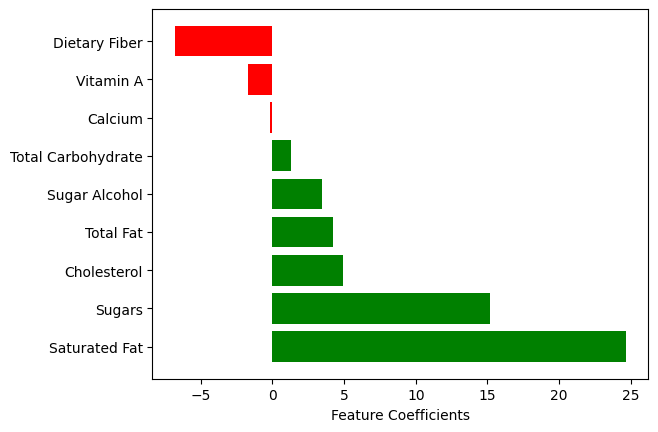

In [108]:
coef_dict = get_feature_coefs(l1_model, 1, feature_cols)
visualize_coefs(coef_dict)

As we can see, unhealthy nutrients such as Saturated Fat, Sugars, Cholesterol, Total Fat, etc., have high positive coefficients. Food items containing unhealthy nutrients will have higher coeficients and will be more likely to be categorized in the 'Less Often' class.

$ \ $

$(4)$ Let's see the coefficents for Class 2, `More Often`:



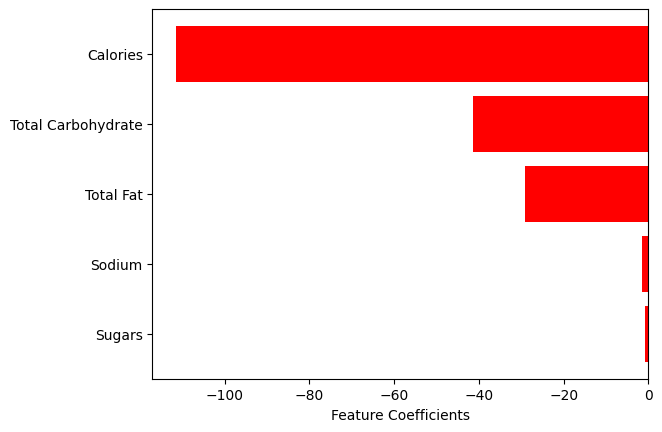

In [109]:
coef_dict = get_feature_coefs(l1_model, 2, feature_cols)
visualize_coefs(coef_dict)

Conversely, if a food item has a high amount of calories, total carbohydrates, and total fat, then it is unlikely to be categorized in the 'More Often' class.


$ \ $

----

## ***Coding Exercise: Train and evaluate a logistic regression model with elastic-net penality***

Now, it's your turn to walk through the end-to-end process of defining, building, evaluating, and interpreting a logistic regression model.

$ \ $

$(1)$ Define a logistic regression with elastic-net penality.



In [110]:
# HINT: sklearn only support saga solver for elastic-net penality
# and you need to set another l1_ratio to be within 0 < l1_ratio <1, in order to actually use elastic-net


# elasticnet penalty to shrink coefficients without removing any features from the model
penalty = 'elasticnet'

# Our classification problem is multinomial
multi_class = 'multinomial'

# Use saga for L1 penalty and multinomial classes
solver = 'saga'

# Max iteration = 1000
max_iter = 1000

# l1_ratio
l1_ratio = 0.1

# Define a elastic-net model
elas_net_model = LogisticRegression(random_state = 123, penalty = 'elasticnet', multi_class = 'multinomial', solver = 'saga', max_iter = 1000, l1_ratio = 0.1)


$ \ $

$(2)$ Train the model with training data.

In [111]:
elas_net_model.fit(X_train, y_train)
preds = elas_net_model.predict(X_test)

$ \ $

$(3)$ Evaluate the model using accuracy, precision, recall, and F1score.

In [112]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.7782805429864253,
 'recall': array([0.87218045, 0.73220641, 0.40909091]),
 'precision': array([0.73510773, 0.83553299, 0.91011236]),
 'f1score': array([0.79779917, 0.78046468, 0.56445993])}

$ \ $

$(4)$ Plot confusion matrix.

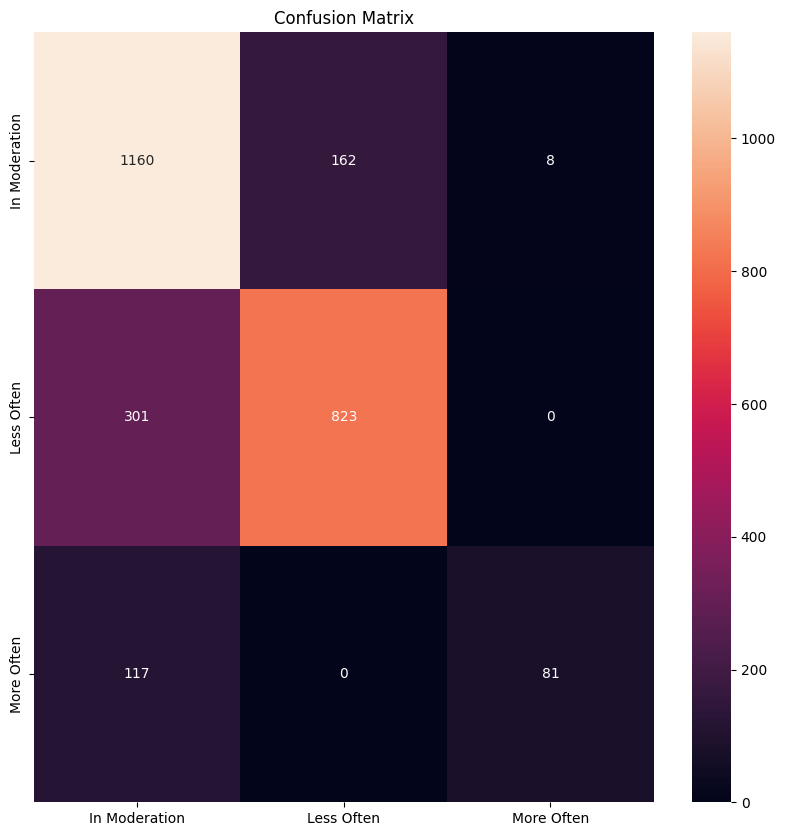

In [113]:
# creamos una figura con un tamaño determinado donde mostraremos nuestra matriz de confusion
plt.figure(figsize=(10, 10))

# creamos una lista donde mostramos los valores encontrados anteriormente en la variable a predecir 
valores = ["In Moderation", "Less Often", "More Often"]

# realizamos un mapa de calor usando la matriz de confusion
cf = confusion_matrix(y_test, preds)
ax = sns.heatmap(cf, annot = True, fmt = "d", xticklabels = valores,  yticklabels = valores)

# establecemos el titulo de la matriz de confusion
ax.set(title = "Confusion Matrix");

$ \ $

$(5)$ Interpret the model by analysing its coefficients.